# Neural Network
A partire dal dataset processato applichiamo una neural network per predirre la classe di appartenenza

## Import dataset TODO cambiare il dataset inseririre il nostro

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./dataset/adult.csv', delimiter=",")

In [17]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,relationship_num,race_num,sex_num,occupation_num,marital-status_num,workclass_num,native-country_num,label_num
0,39,77516,13,2174,0,40,1,4,1,1,4,7,39,0
1,50,83311,13,0,0,13,0,4,1,4,2,6,39,0
2,38,215646,9,0,0,40,1,4,1,6,0,4,39,0
3,53,234721,7,0,0,40,0,2,1,6,2,4,39,0
4,28,338409,13,0,0,40,5,2,0,10,2,4,5,0


In [18]:
from sklearn.model_selection import train_test_split

label = df.pop('label_num')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

## Grid Search

In [19]:
from itertools import product
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Dense, Dropout, InputLayer

grid_params = {
                'hidden_layers': [1, 2,3],
                'hidden_units': [64,128,256],
                'act_funct': ['relu', 'tanh'],
                'learning_rate': [1e-6, 1e-5, 1e-7],
                'optimizer': [Adam, RMSprop]
            }
keys, values = zip(*grid_params.items())
params_list = [dict(zip(keys, v)) for v in product(*values)]

In [20]:
for idx, params in enumerate(params_list):

    #Parametri
    hidden_layers = params['hidden_layers']
    hidden_units = params['hidden_units']
    act_funct = params['act_funct']
    learning_rate = params['learning_rate']
    optimizer = params['optimizer']

    #Creazione del modello
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(1, 13)))

    for i in range(0, hidden_layers):
        model.add(Dense(hidden_units, activation = act_funct))
        model.add(tf.keras.layers.Dropout(0.2))

    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                loss='mean_squared_error',
                metrics=['accuracy'])

    # Allenamento
    y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
    history = model.fit(train_set, y_train,epochs=2,validation_split=0.2)

    #Plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title("LR: "+str(learning_rate)+" ACT: "+act_funct+" LAYER: "+ str(hidden_layers)+ " UNITS: "+ str(hidden_units))


    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.savefig("./nn_grid/plt"+str(idx)+".png")

Epoch 1/2
570/570 [==============================] - 1s 2ms/step - loss: 0.6731 - accuracy: 0.3268 - val_loss: 0.7758 - val_accuracy: 0.2242
Epoch 2/2
570/570 [==============================] - 1s 1ms/step - loss: 0.6656 - accuracy: 0.3343 - val_loss: 0.7759 - val_accuracy: 0.2240
Epoch 1/2
570/570 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.5707 - val_loss: 0.2264 - val_accuracy: 0.7736
Epoch 2/2
570/570 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.5724 - val_loss: 0.2264 - val_accuracy: 0.7736
Epoch 1/2
570/570 [==============================] - 1s 2ms/step - loss: 0.2623 - accuracy: 0.7377 - val_loss: 0.2286 - val_accuracy: 0.7714
Epoch 2/2
570/570 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.7354 - val_loss: 0.2286 - val_accuracy: 0.7714
Epoch 1/2
570/570 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.6179 - val_loss: 0.2286 - val_accuracy: 0.7714
Epoch 2/2
570

KeyboardInterrupt: 

## Allenamento finale

In [4]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, 13)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [5]:
y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
history = model.fit(train_set, y_train,
                    epochs=80,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/80
36/36 [==============================] - 1s 21ms/step - loss: 0.1919 - accuracy: 0.7477 - val_loss: 0.1790 - val_accuracy: 0.7649
Epoch 2/80
36/36 [==============================] - 0s 13ms/step - loss: 0.1875 - accuracy: 0.7575 - val_loss: 0.1785 - val_accuracy: 0.7649
Epoch 3/80
36/36 [==============================] - 0s 11ms/step - loss: 0.1857 - accuracy: 0.7575 - val_loss: 0.1773 - val_accuracy: 0.7649
Epoch 4/80
36/36 [==============================] - 0s 13ms/step - loss: 0.1850 - accuracy: 0.7579 - val_loss: 0.1757 - val_accuracy: 0.7649
Epoch 5/80
36/36 [==============================] - 0s 11ms/step - loss: 0.1826 - accuracy: 0.7584 - val_loss: 0.1737 - val_accuracy: 0.7649
Epoch 6/80
36/36 [==============================] - 1s 14ms/step - loss: 0.1802 - accuracy: 0.7602 - val_loss: 0.1710 - val_accuracy: 0.7660
Epoch 7/80
36/36 [==============================] - 0s 12ms/step - loss: 0.1783 - accuracy: 0.7611 - val_loss: 0.1680 - val_accuracy: 0.7708
Epoch 8/80
36

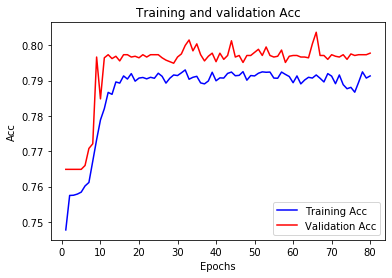

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [16]:
test_pred = model.predict_classes(test_set)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_label,test_pred,target_names=['<=50', '>50']))

              precision    recall  f1-score   support

        <=50       0.79      0.99      0.88      7417
         >50       0.82      0.19      0.31      2352

    accuracy                           0.79      9769
   macro avg       0.81      0.59      0.59      9769
weighted avg       0.80      0.79      0.74      9769

